In [12]:
import pandas as pd

In [13]:
data = pd.read_csv("../Dataset/UpdatedResumeDataSet.csv")

In [17]:
!pip install pymupdf



[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [47]:
# Extract Text from PDF/DOCX Resumes

import fitz  # PyMuPDF

def extract_text_from_pdf(pdf_path):
    text = ""
    doc = fitz.open(pdf_path)
    for page in doc:
        text += page.get_text() + "\n"
    return text

# Example usage
resume_text = extract_text_from_pdf("../PDF/Avishka_Piyumal.pdf")
print(resume_text[:5000])  # Print first 500 characters


Avishka Piyumal 
Data Science Intern 
 
Email: avishkapiyumal16@gmail.com 
LinkedIn: www.linkedin.com/in/avishka-piyumal-56aa52288 
Contact: +94 764 117 235 
GitHub: https://github.com/CodeMaestro016 
 
PROFILE 
I am a Data Science undergraduate with a strong foundation in programming, data analysis, and problem-
solving. My current focus is on machine learning and artificial intelligence, where I am exploring innovative 
approaches to data-driven challenges. I am eager to collaborate on projects and continue growing my expertise 
in the ever-evolving field of AI and Data Science. 
 
EDUCATION 
Sri Lanka Institute of Information Technology 
January 2023 - Present 
BSc (Hons) in Information Technology Specializing in Data Science (UG)  
Relevant Course Work: Machine Learning, Deep Learning, Object-Oriented Programming, SQL, Data 
Structures and Algorithms. 
 
ESOFT Metro Campus                                                                                                               

In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 962 entries, 0 to 961
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  962 non-null    object
 1   Resume    962 non-null    object
dtypes: object(2)
memory usage: 15.2+ KB


In [20]:
data.head(5)

,Category,Resume
0,Data Science,Skills * Programming Languages: Python (pandas...
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...
2,Data Science,"Areas of Interest Deep Learning, Control Syste..."
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab..."


In [21]:
data.shape

(962, 2)

In [22]:
data.isnull()

,Category,Resume
0,False,False
1,False,False
2,False,False
3,False,False
4,False,False
...,...,...
957,False,False
958,False,False
959,False,False
960,False,False


In [24]:
data.isnull().sum()

Category    0
Resume      0
dtype: int64

In [25]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 962 entries, 0 to 961
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  962 non-null    object
 1   Resume    962 non-null    object
dtypes: object(2)
memory usage: 15.2+ KB


In [26]:
!pip install nltk

  Using cached nltk-3.9.1-py3-none-any.whl.metadata (2.9 kB)
  Using cached click-8.1.8-py3-none-any.whl.metadata (2.3 kB)
  Using cached joblib-1.4.2-py3-none-any.whl.metadata (5.4 kB)
  Using cached regex-2024.11.6-cp313-cp313-win_amd64.whl.metadata (41 kB)
  Using cached tqdm-4.67.1-py3-none-any.whl.metadata (57 kB)
Using cached nltk-3.9.1-py3-none-any.whl (1.5 MB)
Using cached regex-2024.11.6-cp313-cp313-win_amd64.whl (273 kB)
Using cached click-8.1.8-py3-none-any.whl (98 kB)
Using cached joblib-1.4.2-py3-none-any.whl (301 kB)
Using cached tqdm-4.67.1-py3-none-any.whl (78 kB)



[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [51]:
print(data.columns)  # Ensure 'Resume' exists


Index(['Category', 'Resume'], dtype='object')


In [52]:
print(data.info())  # Check for missing values and data types
print(data.head())  # View sample data


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 962 entries, 0 to 961
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  962 non-null    object
 1   Resume    962 non-null    object
dtypes: object(2)
memory usage: 15.2+ KB
None
       Category                                             Resume
0  Data Science  Skills * Programming Languages: Python (pandas...
1  Data Science  Education Details \r\nMay 2013 to May 2017 B.E...
2  Data Science  Areas of Interest Deep Learning, Control Syste...
3  Data Science  Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...
4  Data Science  Education Details \r\n MCA   YMCAUST,  Faridab...


In [81]:
# Text Cleaning (Removing Stopwords, Punctuation, Lowercasing)
import re
import nltk
import pandas as pd
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

# Download required NLTK resources
nltk.download("stopwords")
nltk.download("punkt")

# Load stopwords
stop_words = set(stopwords.words("english"))

# Function for text cleaning
def clean_text(text):
    text = text.lower()  # Convert to lowercase
    text = re.sub(r"\W+", " ", text)  # Remove punctuation & special characters
    text = re.sub(r"\d+", "", text)  # Remove numbers
    tokens = word_tokenize(text)  # Tokenize
    tokens = [word for word in tokens if word not in stop_words]  # Remove stopwords
    return " ".join(tokens)

# Load dataset
data = pd.read_csv("../Dataset/UpdatedResumeDataSet.csv")

# Ensure correct column name
print(data.columns)  # Check available column names





Index(['Category', 'Resume'], dtype='object')


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\USER\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\USER\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [56]:
import nltk
nltk.download("punkt")
nltk.download("stopwords")


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\USER\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\USER\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [58]:
data.head(5)

,Category,Resume
0,Data Science,Skills * Programming Languages: Python (pandas...
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...
2,Data Science,"Areas of Interest Deep Learning, Control Syste..."
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab..."


In [62]:
!pip install scikit-learn


  Using cached scikit_learn-1.6.1-cp313-cp313-win_amd64.whl.metadata (15 kB)
  Using cached scipy-1.15.1-cp313-cp313-win_amd64.whl.metadata (60 kB)
  Using cached threadpoolctl-3.5.0-py3-none-any.whl.metadata (13 kB)
Using cached scikit_learn-1.6.1-cp313-cp313-win_amd64.whl (11.1 MB)
Using cached scipy-1.15.1-cp313-cp313-win_amd64.whl (43.6 MB)
Using cached threadpoolctl-3.5.0-py3-none-any.whl (18 kB)



[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [63]:
import sklearn
print(sklearn.__version__)


1.6.1


In [65]:
cleaned_resume = "This is the cleaned text of the resume."


In [67]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Define cleaned resume text (replace with your actual cleaned text)
cleaned_resume = "This is the cleaned text of the resume."

# Initialize the TF-IDF Vectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=5000)

# Apply TF-IDF on the cleaned resume
resume_tfidf = tfidf_vectorizer.fit_transform([cleaned_resume])

# Output the shape
print(resume_tfidf.shape)  # Output should be (1, 5000)


(1, 7)


In [70]:
from sklearn.feature_extraction.text import CountVectorizer

# Create a CountVectorizer to extract word frequencies
vectorizer = CountVectorizer(stop_words="english", max_features=1000)
X_word_counts = vectorizer.fit_transform(data["Resume"])

# Convert to DataFrame to view top words
word_count_df = pd.DataFrame(X_word_counts.toarray(), columns=vectorizer.get_feature_names_out())
word_count_sum = word_count_df.sum(axis=0).sort_values(ascending=False)

# Top 10 most frequent words
print(word_count_sum.head(10))


exprience      3829
company        3568
project        3498
months         3288
description    3122
details        3096
data           2152
management     1979
team           1946
maharashtra    1449
dtype: int64


In [71]:
!pip install wordcloud



[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


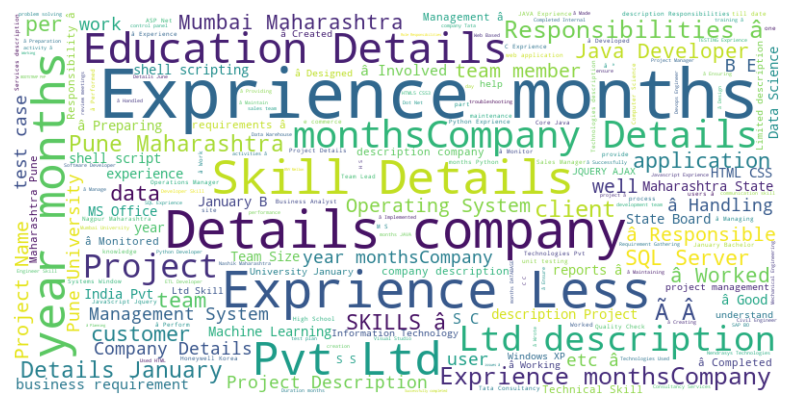

In [74]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Combine all resumes for word cloud generation
all_text = " ".join(data["Resume"])

# Generate word cloud
wordcloud = WordCloud(width=800, height=400, background_color="white").generate(all_text)

# Plot the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()


In [76]:
!pip install seaborn

  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
Using cached seaborn-0.13.2-py3-none-any.whl (294 kB)



[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


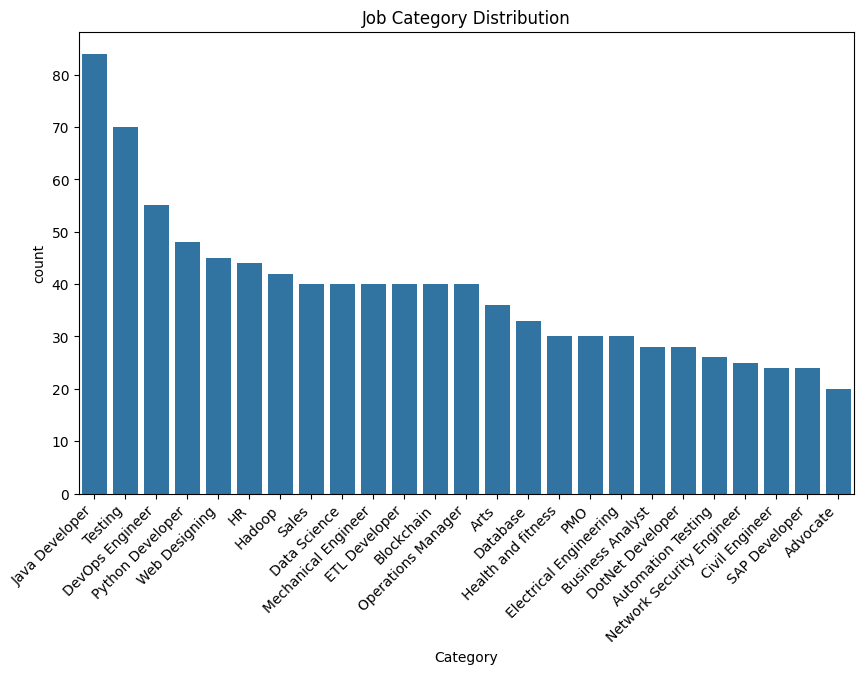

In [77]:
import seaborn as sns

# Visualize the distribution of job categories
plt.figure(figsize=(10, 6))
sns.countplot(data=data, x="Category", order=data["Category"].value_counts().index)
plt.xticks(rotation=45, ha="right")
plt.title("Job Category Distribution")
plt.show()


Category
Java Developer               84
Testing                      70
DevOps Engineer              55
Python Developer             48
Web Designing                45
HR                           44
Hadoop                       42
Sales                        40
Data Science                 40
Mechanical Engineer          40
ETL Developer                40
Blockchain                   40
Operations Manager           40
Arts                         36
Database                     33
Health and fitness           30
PMO                          30
Electrical Engineering       30
Business Analyst             28
DotNet Developer             28
Automation Testing           26
Network Security Engineer    25
Civil Engineer               24
SAP Developer                24
Advocate                     20
Name: count, dtype: int64


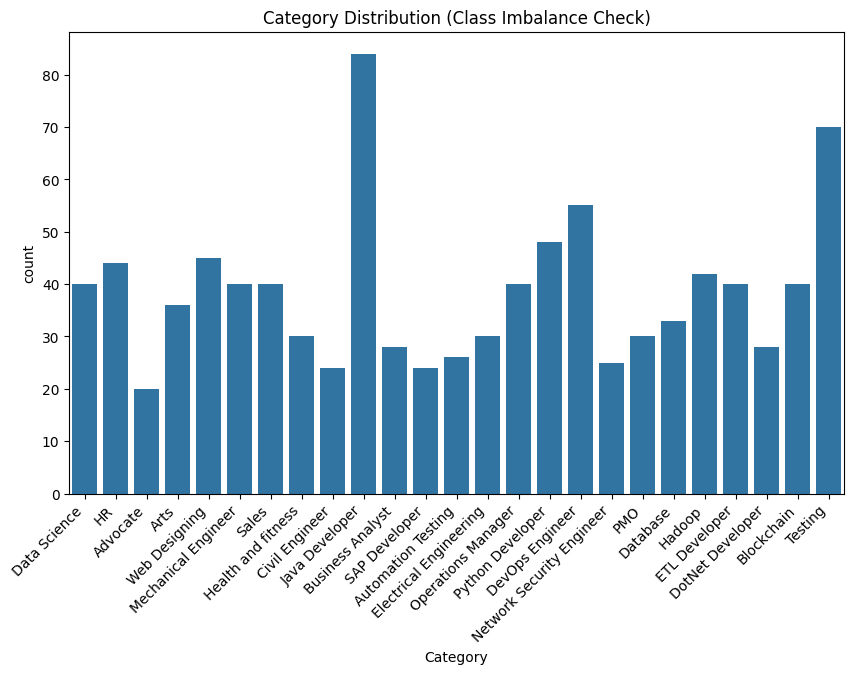

In [78]:
# Check class distribution (imbalanced categories)
category_counts = data['Category'].value_counts()
print(category_counts)

# Visualize class distribution
plt.figure(figsize=(10, 6))
sns.countplot(data=data, x="Category")
plt.xticks(rotation=45, ha="right")
plt.title("Category Distribution (Class Imbalance Check)")
plt.show()


In [82]:
# Step 4: Model Training (Supervised Learning)

In [86]:
from sklearn.model_selection import train_test_split

# Ensure the feature matrix X has the correct number of rows (one for each resume)
X = tfidf_vectorizer.fit_transform(data['Resume']).toarray()  # Apply TF-IDF to all cleaned resumes

# Target variable (resume categories)
y = data['Category']

# Check the shapes to make sure they match
print(X.shape, y.shape)  # Should print (num_samples, num_features) for X and (num_samples,) for y

# Split into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Verify the split
print(X_train.shape, X_test.shape)


(962, 5000) (962,)
(769, 5000) (193, 5000)


In [ ]:
# Logistic Regression is a good baseline model for text classification tasks.

In [87]:
from sklearn.linear_model import LogisticRegression

# Initialize the Logistic Regression model
model = LogisticRegression(max_iter=1000)

# Train the model on the training data
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Print classification report
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))


                           precision    recall  f1-score   support

                 Advocate       1.00      1.00      1.00         3
                     Arts       1.00      1.00      1.00         6
       Automation Testing       1.00      1.00      1.00         5
               Blockchain       1.00      1.00      1.00         7
         Business Analyst       1.00      1.00      1.00         4
           Civil Engineer       1.00      1.00      1.00         9
             Data Science       1.00      1.00      1.00         5
                 Database       1.00      1.00      1.00         8
          DevOps Engineer       1.00      0.93      0.96        14
         DotNet Developer       1.00      1.00      1.00         5
            ETL Developer       1.00      1.00      1.00         7
   Electrical Engineering       1.00      1.00      1.00         6
                       HR       1.00      1.00      1.00        12
                   Hadoop       1.00      1.00      1.00     

In [88]:
from sklearn.metrics import classification_report

# Print the classification report
print(classification_report(y_test, y_pred))


                           precision    recall  f1-score   support

                 Advocate       1.00      1.00      1.00         3
                     Arts       1.00      1.00      1.00         6
       Automation Testing       1.00      1.00      1.00         5
               Blockchain       1.00      1.00      1.00         7
         Business Analyst       1.00      1.00      1.00         4
           Civil Engineer       1.00      1.00      1.00         9
             Data Science       1.00      1.00      1.00         5
                 Database       1.00      1.00      1.00         8
          DevOps Engineer       1.00      0.93      0.96        14
         DotNet Developer       1.00      1.00      1.00         5
            ETL Developer       1.00      1.00      1.00         7
   Electrical Engineering       1.00      1.00      1.00         6
                       HR       1.00      1.00      1.00        12
                   Hadoop       1.00      1.00      1.00     

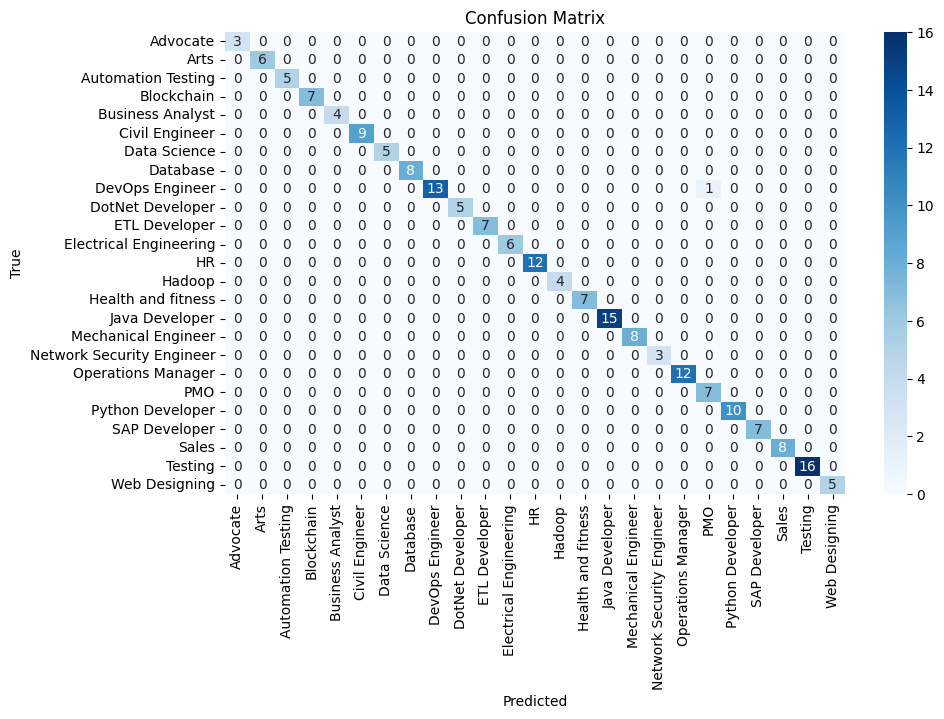

In [89]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix using seaborn
plt.figure(figsize=(10, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=model.classes_, yticklabels=model.classes_)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()


In [ ]:
# Hyperparameter Tuning

from sklearn.model_selection import GridSearchCV

# Hyperparameter grid for Logistic Regression
param_grid = {
    'C': [0.1, 1, 10],  # Regularization strength
    'solver': ['liblinear', 'lbfgs'],  # Optimization algorithms
}

# Grid search with cross-validation
grid_search = GridSearchCV(LogisticRegression(max_iter=1000), param_grid, cv=5, verbose=1, n_jobs=-1)

# Fit the grid search
grid_search.fit(X_train, y_train)

# Get the best model
best_model = grid_search.best_estimator_

# Evaluate the best model
y_pred_best = best_model.predict(X_test)
print(classification_report(y_test, y_pred_best))


Fitting 5 folds for each of 6 candidates, totalling 30 fits
                           precision    recall  f1-score   support

                 Advocate       1.00      1.00      1.00         3
                     Arts       1.00      1.00      1.00         6
       Automation Testing       1.00      1.00      1.00         5
               Blockchain       1.00      1.00      1.00         7
         Business Analyst       1.00      1.00      1.00         4
           Civil Engineer       1.00      1.00      1.00         9
             Data Science       1.00      1.00      1.00         5
                 Database       1.00      1.00      1.00         8
          DevOps Engineer       1.00      0.93      0.96        14
         DotNet Developer       1.00      1.00      1.00         5
            ETL Developer       1.00      1.00      1.00         7
   Electrical Engineering       1.00      1.00      1.00         6
                       HR       1.00      1.00      1.00        12
 

In [ ]:
# accuracy after hypoparameter tune

In [93]:
from sklearn.metrics import accuracy_score

# Get the best model from grid search
best_model = grid_search.best_estimator_

# Make predictions on the test set using the best model
y_pred_best = best_model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred_best)

print(f"Accuracy of the tuned model: {accuracy:.4f}")


Accuracy of the tuned model: 0.9948


In [94]:
import pickle
with open('Resume-Screening-System.pickle', 'wb') as file:
    pickle.dump(best_model, file)

In [95]:
print(f"Loaded model: {best_model}")

Loaded model: LogisticRegression(C=10, max_iter=1000, solver='liblinear')


In [97]:
from sklearn.metrics import classification_report, accuracy_score

# Evaluate the model on the test set
y_pred = best_model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of the model on test set: {accuracy:.4f}")

# Detailed classification report
print(classification_report(y_test, y_pred))


Accuracy of the model on test set: 0.9948
                           precision    recall  f1-score   support

                 Advocate       1.00      1.00      1.00         3
                     Arts       1.00      1.00      1.00         6
       Automation Testing       1.00      1.00      1.00         5
               Blockchain       1.00      1.00      1.00         7
         Business Analyst       1.00      1.00      1.00         4
           Civil Engineer       1.00      1.00      1.00         9
             Data Science       1.00      1.00      1.00         5
                 Database       1.00      1.00      1.00         8
          DevOps Engineer       1.00      0.93      0.96        14
         DotNet Developer       1.00      1.00      1.00         5
            ETL Developer       1.00      1.00      1.00         7
   Electrical Engineering       1.00      1.00      1.00         6
                       HR       1.00      1.00      1.00        12
                   

In [98]:
from sklearn.model_selection import cross_val_score

# Cross-validation on the whole dataset
cv_scores = cross_val_score(best_model, X, y, cv=5, scoring='accuracy')
print(f"Cross-validation scores: {cv_scores}")
print(f"Average cross-validation accuracy: {cv_scores.mean():.4f}")


Cross-validation scores: [0.97927461 1.         1.         1.         1.        ]
Average cross-validation accuracy: 0.9959


In [99]:
# Check for Overfitting or Underfitting
# Training performance (if you have access to training data)
y_train_pred = best_model.predict(X_train)
train_accuracy = accuracy_score(y_train, y_train_pred)
print(f"Training accuracy: {train_accuracy:.4f}")


Training accuracy: 1.0000


In [100]:
# Save the vectorizer
with open('vectorizer.pkl', 'wb') as vectorizer_file:
    pickle.dump(vectorizer, vectorizer_file)